In [1]:
pip install imbalanced-learn


     -------------------------------------- 238.4/238.4 kB 2.1 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report

#skitlearning for data preprocessing, evaluation and modelling

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, roc_curve, auc, precision_recall_curve

from IPython.display import display, Markdown

In [3]:
# Load the dataset
df = pd.read_csv("framingham.csv")

#fill NA with zero
df.fillna(0, inplace=True)

#display first few rows
display(df.head(40))

# Define features and target variable
y = df['TenYearCHD'] 
X = df.drop(columns=['TenYearCHD'])

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
5,0,43,2.0,0,0.0,0.0,0,1,0,228.0,180.0,110.0,30.30,77.0,99.0,0
6,0,63,1.0,0,0.0,0.0,0,0,0,205.0,138.0,71.0,33.11,60.0,85.0,1
7,0,45,2.0,1,20.0,0.0,0,0,0,313.0,100.0,71.0,21.68,79.0,78.0,0
8,1,52,1.0,0,0.0,0.0,0,1,0,260.0,141.5,89.0,26.36,76.0,79.0,0
9,1,43,1.0,1,30.0,0.0,0,1,0,225.0,162.0,107.0,23.61,93.0,88.0,0


In [4]:
# Split dataset into training (80%) and test (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)

# Display training set size
print("Training set size:", X_train.shape, y_train.shape)
print("Test set size:", X_test.shape, y_test.shape)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Training set size: (3390, 15) (3390,)
Test set size: (848, 15) (848,)


L2 = l2 regularization / ridge. Calculated as the square root of the sum of the squared vector values. Helps prevent overfitting. 
c = 1 - the inverse of regularization strength 

In [5]:
# Train logistic regression model
clf = LogisticRegression(penalty='l2', dual=False, tol=0.0001, C=1.0, fit_intercept=True, 
                         intercept_scaling=1, class_weight=None, random_state=7, 
                         solver='lbfgs', max_iter=100, multi_class='auto', verbose=0, 
                         warm_start=False, n_jobs=None, l1_ratio=None)
clf.fit(X_train, y_train)


c:\Users\gaaya\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(multi_class='auto', random_state=7)

In [6]:
# Make predictions
y_pred = clf.predict(X_test)
y_prob = clf.predict_proba(X_test)[:, 1]

In [7]:
# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.98      0.91       714
           1       0.33      0.04      0.08       134

    accuracy                           0.83       848
   macro avg       0.59      0.51      0.49       848
weighted avg       0.76      0.83      0.78       848



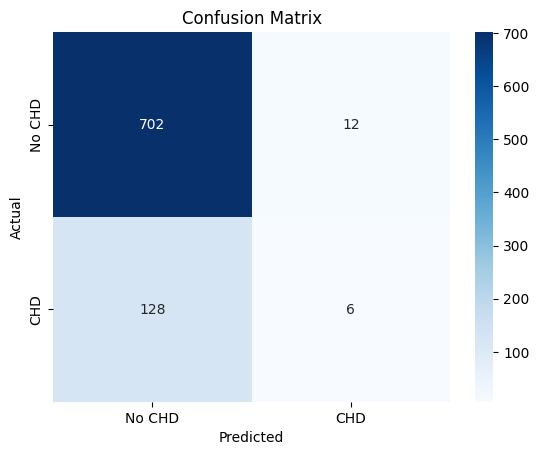

In [8]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["No CHD", "CHD"], yticklabels=["No CHD", "CHD"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

ROC Curve Background Info:

False Positive Rate (FPR): The proportion of negative cases (No CHD) that were incorrectly classified as positive (CHD).

True Positive Rate (TPR): The proportion of actual positive cases (CHD) that were correctly classified.

AUC ranges from 0 to 1:
- 1 is perfect classification
- 0.5 is random guessing (no predictive power) 
- < 0.5 is worse than random 



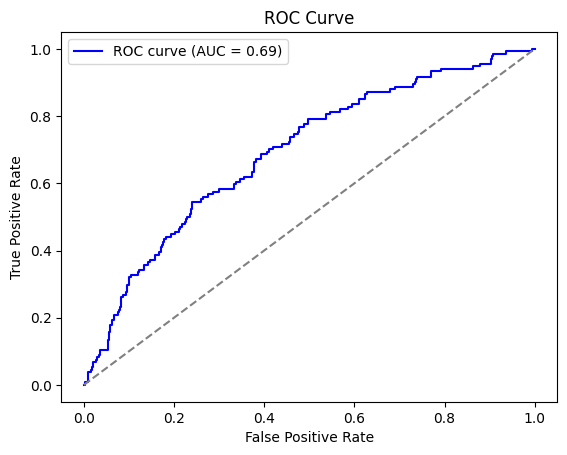

In [9]:
# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


My model has a 74% chance of distinguishing a CHD positive case from a CHD negative case. Not perfect, but has moderate predictive performance. 




In [10]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=7)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

print("Class distribution after SMOTE:")
print(pd.Series(y_train_smote).value_counts())

# Train logistic regression model on balanced data
clf_smote = LogisticRegression(penalty='l2', solver='lbfgs', max_iter=100, random_state=7)
clf_smote.fit(X_train_smote, y_train_smote)

# Make predictions
y_pred_smote = clf_smote.predict(X_test)
y_prob_smote = clf_smote.predict_proba(X_test)[:, 1]

# Evaluate the model
print("Classification Report (After SMOTE):")
print(classification_report(y_test, y_pred_smote))

Class distribution after SMOTE:
TenYearCHD
0    2880
1    2880
Name: count, dtype: int64
Classification Report (After SMOTE):
              precision    recall  f1-score   support

           0       0.90      0.68      0.77       714
           1       0.25      0.58      0.35       134

    accuracy                           0.67       848
   macro avg       0.58      0.63      0.56       848
weighted avg       0.80      0.67      0.71       848



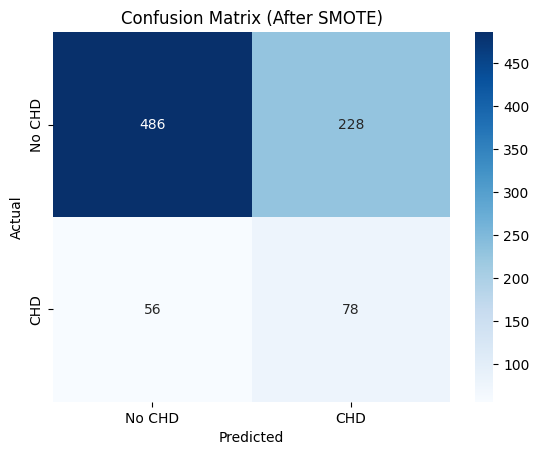

In [11]:
# Confusion Matrix
cm_smote = confusion_matrix(y_test, y_pred_smote)
sns.heatmap(cm_smote, annot=True, fmt='d', cmap='Blues', xticklabels=["No CHD", "CHD"], yticklabels=["No CHD", "CHD"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix (After SMOTE)")
plt.show()


In [12]:
from sklearn.metrics import accuracy_score

# Training accuracy
y_train_pred = clf.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)

# Test accuracy
test_accuracy = accuracy_score(y_test, y_pred)

print(f"Training Accuracy (Original): {train_accuracy:.4f}")
print(f"Testing Accuracy (Original): {test_accuracy:.4f}")


Training Accuracy (Original): 0.8584
Testing Accuracy (Original): 0.8349
